# Naive Bayes
Naive Bayes is a supervised machine learning algorithm used for classification. It relies on the principle of Bayes' theorem and assumes independence between the features. The algorithm calculates the probability of each class for a given data point and assigns it to the class with the highest probability. It starts by estimating the prior probabilities and likelihoods from the training data. During the prediction phase, it applies these probabilities to classify new instances based on the calculated posterior probabilities.

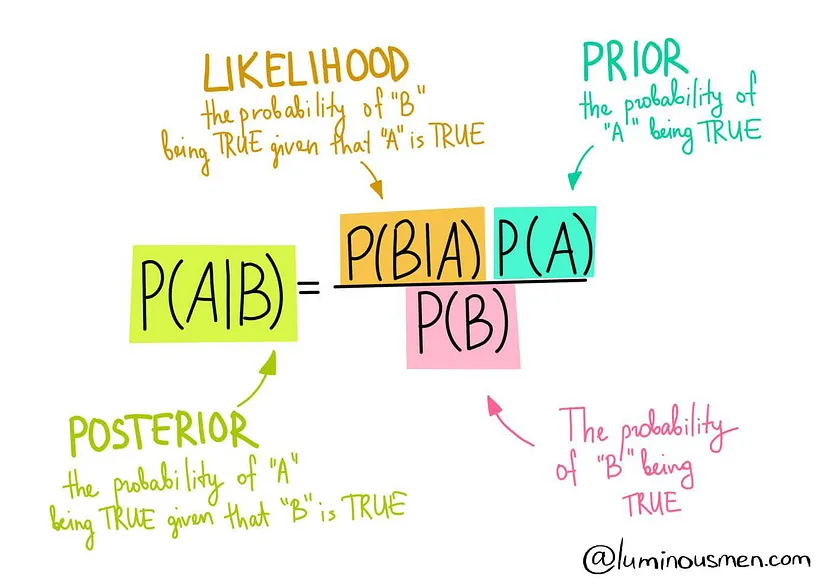

### Import libraries and initialize random generator

In [1]:
import numpy as np
np.random.seed(0)

### Read data with sklearn
we will use the flower iris dataset. This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length



In [2]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

### Split dataset

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Naive Bayes algorithm
Steps:
1. Fit: Calculate the summary statistics and the prior for each class in the (training) dataset
2. Predict: Calculate the probability of every class for each sample in the (test) dataset. Therefore, get the probability of data given the classes’ (Gaussian) distribution and combine it with the prior.


### Calculating summary statistics
We will calculate the summary statistics for each class (and feature) as well as the prior

In [12]:
n_samples, n_features = X_train.shape # get number of samples (rows) and features (columns)
print(n_samples,n_features)

120 4


In [13]:
n_classes = len(np.unique(y_train)) # get number of uniques classes
print(n_classes)

3



$$
P(y|x_1, x_2, \ldots, x_n) = \frac{P(y) \cdot P(x_1, x_2, \ldots, x_n |y)}{P(x_1, x_2, \ldots, x_n)}
$$

where:
- $P(y|x_1, x_2, \ldots, x_n)$ is the posterior probability of class $y$ given the features $x_1, x_2, \ldots, x_n$.
- $P(y)$ is the prior probability of class $y$.
- $P(x_i|y)$ is the probability of feature $x_i$ given class $y$.
- $P(x_1, x_2, \ldots, x_n)$ is the probability of the features $x_1, x_2, \ldots, x_n$ occurring together.

The naive assumption of conditional independence allows us to simplify the equation:

$$
P(y|x_1, x_2, \ldots, x_n) = \frac{P(y) \cdot P(x_1|y) \cdot P(x_2|y) \cdot \ldots \cdot P(x_n|y)}{P(x_1, x_2, \ldots, x_n)}
$$


In [20]:
# create three zero-matrices to store summary stats & prior
mean = np.zeros((n_classes, n_features))
variance = np.zeros((n_classes, n_features))
priors = np.zeros(n_classes)
print("mean:\n",mean)
print("variance:\n",variance)
print("priors:\n",priors)

mean:
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
variance:
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
priors:
 [0. 0. 0.]


In [22]:
for class_ind in range(n_classes):
    # create a subset of data for the specific class 'class_ind'
    X_class = X_train[y_train == class_ind]

    # calculate statistics and update zero-matrices, rows=classes, cols=features
    mean[class_ind, :] = np.mean(X_class, axis=0)
    variance[class_ind, :] = np.var(X_class, axis=0)
    priors[class_ind] = X_class.shape[0] / n_samples


In [23]:
print("mean:\n",mean)
print("variance:\n",variance)
print("priors:\n",priors)

mean:
 [[4.96153846 3.36666667 1.46666667 0.23333333]
 [5.94594595 2.73243243 4.22972973 1.30540541]
 [6.525      2.95227273 5.53409091 2.02045455]]
variance:
 [[0.10749507 0.13042735 0.02529915 0.01094017]
 [0.274916   0.1065157  0.21344047 0.03943024]
 [0.38642045 0.09204029 0.30315599 0.07889979]]
priors:
 [0.325      0.30833333 0.36666667]


#### Gaussian distribution function
In order to make a prediction, we need to get the probability of data belonging to a certain class. Calculating the probability of observing a given real-value is difficult. One way we can do this is to assume that the values are drawn from a distribution, such as a bell curve or Gaussian distribution This allows us to calculate the probability of a value coming from the distribution.

For simplicity, we assume the data's underlying distribution is gaussian (normal). If the data's underlying distribution is not gaussian, the real distribution should  be used (such as bernoulli, multinomial, ...)

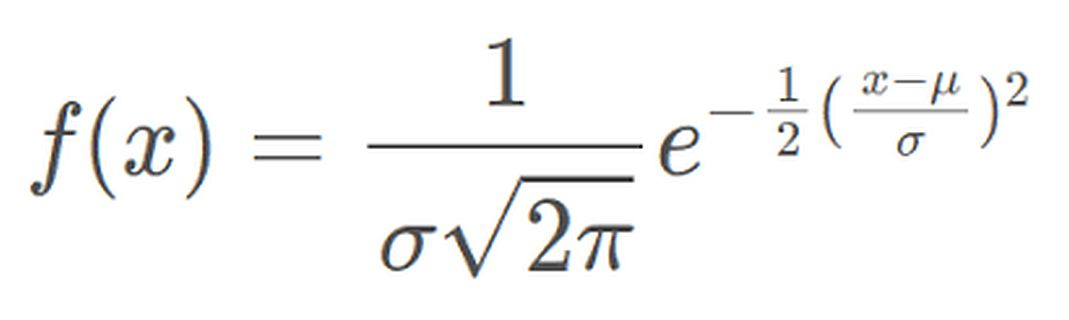


In [5]:
def gaussian_density(x, mean, var):
    # implementation of gaussian density function
    const = 1 / np.sqrt(var * 2 * np.pi)
    proba = np.exp(-0.5 * ((x - mean) ** 2 / var))
    return const * proba

### Calculating (numerator part of) the posterior probability
Recall the posterior equation:
$$
P(y|x_1, x_2, \ldots, x_n) = \frac{P(y) \cdot P(x_1|y) \cdot P(x_2|y) \cdot \ldots \cdot P(x_n|y)}{P(x_1, x_2, \ldots, x_n)}
$$

In the code below, we are actually just calculating the numerator of the right hand side. The reason for why is left as an exercise.
$$
 {P(y) \cdot P(x_1|y) \cdot P(x_2|y) \cdot \ldots \cdot P(x_n|y)}
 $$
 
note

In [40]:
x = np.array([5.8, 4.0,  1.2, 0.2])
for class_ind in range(n_classes):
    # get summary stats & prior
    class_means = mean[class_ind]
    class_variances = variance[class_ind]
    class_priors = priors[class_ind]

    probability_of_coming_from_distribution = gaussian_density(x, class_means, class_variances)
    print(probability_of_coming_from_distribution )
    
    product = np.prod(probability_of_coming_from_distribution)
    # calculate new posterior & append to list
    posterior = class_prior * product 
    print("(numerator of the) posterior of being class",class_ind,"is =",posterior)
    print("\n")


[0.04624586 0.23736665 0.61517309 3.62530037]
(numerator of the) posterior of being class 0 is = 0.008976463986019308


[7.31957233e-01 6.48131671e-04 3.95908867e-10 3.74734639e-07]
(numerator of the) posterior of being class 1 is = 2.580711454349056e-20


[3.25092838e-01 3.38128400e-03 2.54133428e-14 1.07513501e-09]
(numerator of the) posterior of being class 2 is = 1.1012483739537062e-26




#### Prediction function
To make predictions, we need to get the probability of an example belonging to a certain class (i.e. coming from the same distribution). 

To classify a new instance, we select the class with the highest (numerator part of the) posterior probability. This can be written as:

$$
\hat{y} = \underset{y}{\arg\max} \left( P(y) \cdot \prod_{i=1}^{n} P(x_i|y) \right)
$$




In [44]:
def predict(X_list, mean, variance, priors):
    n_classes, n_features = mean.shape
    y_hat = []

    #X_list is a list of iris dimensions, so we will go over each of them
    for x in X_list:  
        # store new posteriors for each class in a single list
        posteriors = []

        for class_ind in range(n_classes):
            # get summary stats & prior
            class_means = mean[class_ind]
            class_variances = variance[class_ind]
            class_priors = priors[class_ind]

            probability_of_coming_from_distribution = gaussian_density(x, class_means, class_variances)

            product = np.prod(probability_of_coming_from_distribution)
            # calculate new posterior & append to list
            posterior = class_prior * product 
            posteriors.append(posterior)
        # append the index with the highest class probability
        y_hat.append(np.argmax(posteriors))

    return np.array(y_hat)

### Evaluate accuracy

In [45]:
mean, variance, priors = fit(X_train, y_train)
predictions = predict(X_test, mean, variance, priors)

correct_count = 0
for i in range(len(y_test)):
    if y_test[i] == predictions[i]:
        correct_count += 1

accuracy = correct_count / len(y_test)
print(accuracy)


0.9666666666666667


### Exercise
1. Under what condition is it suitable to use the gaussian distribution in naive bayes?
2. Why did we only calculate the numerator part of the posterior in the prediction function? (hint: What is the goal for us to calculate the posteriors? does the actual values of the posteriors matter?)
3. Notice when calculating the posteriors, we get really small numbers. When dealing with probabilities, especially when multiplying them together, the values can become very small. This can cause numerical issues or floating point calculation inaccuracies. Taking the logarithm of the probabilities helps avoid underflow issues by converting the multiplications into additions, which are computationally more stable. We can add the logarithms of the probabilities, which preserves the relative ordering of the probabilities while providing better numerical stability. Change the prediction function so it uses logarithms.
4. Change the code into a Bernoulli Naive Bayes. 

```
def predict(X, mean, variance, priors):
    n_classes, n_features = mean.shape
    y_hat = []

    for x in X:
        # store new posteriors for each class in a single list
        posteriors = []

        for class_ind in range(n_classes):
            # get summary stats & prior
            class_mean = mean[class_ind]
            class_variance = variance[class_ind]
            class_prior = np.log(priors[class_ind])

            # calculate new posterior & append to list
            posterior = np.sum(np.log(gaussian_density(x, class_mean, class_variance)))
            posterior = class_prior + posterior
            posteriors.append(posterior)
        # append the index with the highest class probability
        y_hat.append(np.argmax(posteriors))

    return np.array(y_hat)
```

### References
- https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/
- https://github.com/marvinlanhenke/DataScience/tree/main/MachineLearningFromScratch/NaiveBayes 
- https://towardsdatascience.com/implementing-naive-bayes-from-scratch-df5572e042ac
- https://medium.com/@rangavamsi5/na%C3%AFve-bayes-algorithm-implementation-from-scratch-in-python-7b2cc39268b9